# Step #1. Background Detection

Try to extract background and cut it off

In [21]:
# Base import

import imutils
import cv2

import numpy as np
import PIL

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

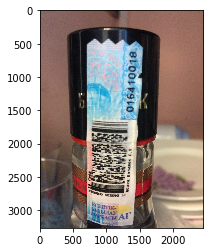

In [49]:
# Load image

excise_src = cv2.imread("test_data/IMG_0307.JPG")

plt.imshow(cv2.cvtColor(excise_src, cv2.COLOR_BGR2RGB))

# Color threasholding Grayscale, Blur, Select edges

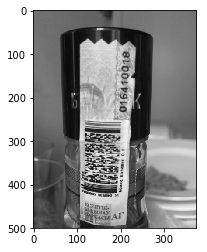

In [139]:
resized = imutils.resize(excise_src, height=500)
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB))

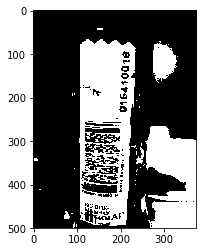

In [142]:
# Basic threshold example
_, thresholded = cv2.threshold(gray, 130, 255, cv2.THRESH_BINARY);

#mask = cv2.inRange(resized, np.array([200, 200, 200], dtype = "uint8"), np.array([255, 255, 255], dtype = "uint8"))
#masked = cv2.bitwise_and(resized, resized, mask = mask)
plt.imshow(cv2.cvtColor(thresholded, cv2.COLOR_GRAY2RGB))

### Basic threshold suks. Try adoptive

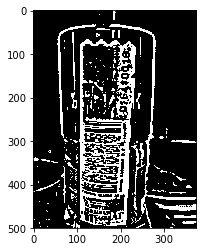

In [164]:
adoptive_thresholded = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 17, -10)

plt.imshow(cv2.cvtColor(adoptive_thresholded, cv2.COLOR_GRAY2RGB))

### Another fail. So I want to try calculate threshold coefficient

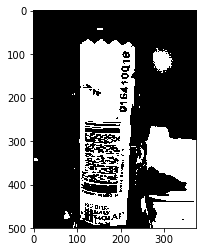

In [158]:
_, thresholded = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU);

plt.imshow(cv2.cvtColor(thresholded, cv2.COLOR_GRAY2RGB))

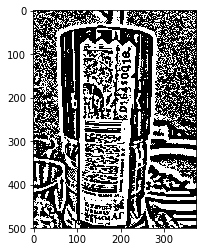

In [166]:
thresholded = cv2.ximgproc.niBlackThreshold(gray, 255, cv2.THRESH_BINARY, 17, 0)

plt.imshow(cv2.cvtColor(thresholded, cv2.COLOR_GRAY2RGB))

## Histohram eqalization

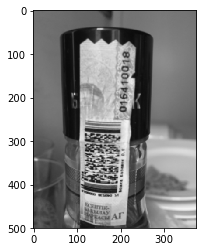

In [189]:
equ = cv2.equalizeHist(gray)
blurred = cv2.GaussianBlur(gray, (3, 3), 0)
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_GRAY2RGB))

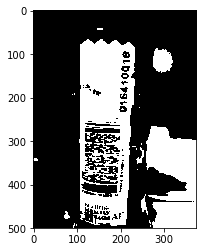

In [190]:
_, thresholded = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU);

plt.imshow(cv2.cvtColor(thresholded, cv2.COLOR_GRAY2RGB))

 ### Try morphology

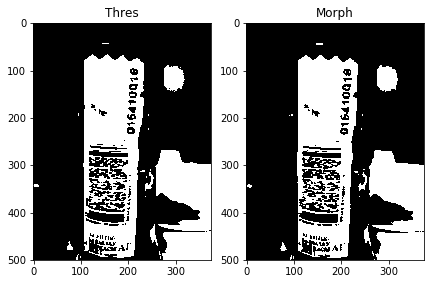

Wall time: 663 ms


In [192]:
%%time

#kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
kernel = np.ones((2,2),np.uint8)
morphed = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel)

# show the images
fig = plt.figure(figsize=(7,7))

a = fig.add_subplot(1,2,1)
imgplot = plt.imshow(cv2.cvtColor(thresholded, cv2.COLOR_GRAY2RGB))
a.set_title('Thres')

a = fig.add_subplot(1,2,2)
imgplot = plt.imshow(cv2.cvtColor(morphed, cv2.COLOR_GRAY2RGB))
a.set_title('Morph')

plt.show()

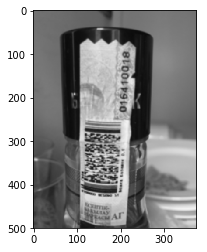

In [60]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_GRAY2RGB))

## I don't want to use blur and morph

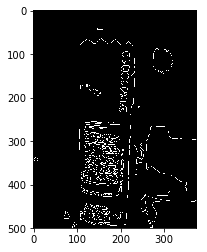

In [193]:
edged = cv2.Canny(thresholded, 50, 230, 255)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_GRAY2RGB))

# Manual Canny edge detector is horrible

Canny edge detector looks like this:

`cv2.canny(image, lower, upper)`

Where image  is the image that we want to detect edges in; and lower  and upper are our integer thresholds for lower and upper boundary on the gradient values, respectively.

The problem becomes determining these lower and upper thresholds.

What is the optimal value for the thresholds?

This question is especially important because we are processing multiple excise captured under varying lighting conditions.

This trick will save you time parameter tuning — and you’ll still get a nice Canny edge map after applying the function.

In [194]:
def auto_canny(image, sigma=0.33):
	# compute the median of the single channel pixel intensities
	v = np.median(image)
 
	# apply automatic Canny edge detection using the computed median
	lower = int(max(50, (1.0 - sigma) * v))
	upper = int(min(230, (1.0 + sigma) * v))
	edged = cv2.Canny(image, lower, upper)
 
	# return the edged image
	return edged

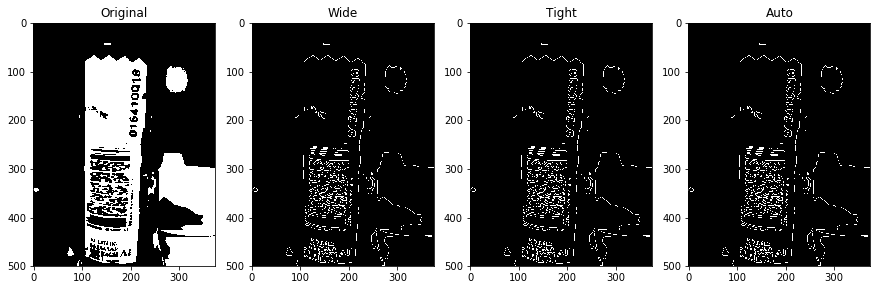

In [195]:
# apply Canny edge detection using a wide threshold, tight
# threshold, and automatically determined threshold
wide = cv2.Canny(thresholded, 10, 200)
tight = cv2.Canny(thresholded, 225, 250)
auto = auto_canny(thresholded)

# show the images
fig = plt.figure(figsize=(15,15))

a = fig.add_subplot(1,4,1)
imgplot = plt.imshow(cv2.cvtColor(thresholded, cv2.COLOR_GRAY2RGB))
a.set_title('Original')

a = fig.add_subplot(1,4,2)
imgplot = plt.imshow(cv2.cvtColor(wide, cv2.COLOR_GRAY2RGB))
a.set_title('Wide')

a = fig.add_subplot(1,4,3)
imgplot = plt.imshow(cv2.cvtColor(tight, cv2.COLOR_GRAY2RGB))
a.set_title('Tight')

a = fig.add_subplot(1,4,4)
imgplot = plt.imshow(cv2.cvtColor(auto, cv2.COLOR_GRAY2RGB))
a.set_title('Auto')

plt.show()

## Same result

# Conclusion

Resize
Wall time: 38.6 ms
Grayscale
Wall time: 976 µs
Histohram equalization
Wall time: 977 µs
Gaussian blur
Wall time: 975 µs
Segmentation
Wall time: 974 µs


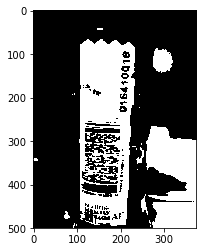

In [206]:
excise_src = cv2.imread("test_data/IMG_0307.JPG")
print("Resize")
%time resized = imutils.resize(excise_src, height=500)
print("Grayscale")
%time gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
print("Histohram equalization")
%time equ = cv2.equalizeHist(gray)
print("Gaussian blur")
%time blurred = cv2.GaussianBlur(gray, (3, 3), 0)
print("Segmentation")
%time _, thresholded = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.imshow(cv2.cvtColor(thresholded, cv2.COLOR_GRAY2RGB))

In [208]:
def excise_segmentation(image):
    
    resized = imutils.resize(excise_src, height=500)
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    equ = cv2.equalizeHist(gray)
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)
    _, thresholded = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
 
    # return the segmentationed image
    return thresholded

Total function and timings
Wall time: 60.5 ms


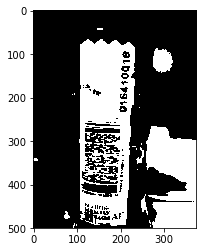

In [209]:
print("Total function and timings")

%time thresholded = excise_segmentation(excise_src)

plt.imshow(cv2.cvtColor(thresholded, cv2.COLOR_GRAY2RGB))